In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


# Exercise 1

In [2]:
rf = 0.05
mu = 0.15
sigma = 0.25
V_0 = 100
T = 5
B = 50

In [3]:
def European_Call (S,K,t,T,q,r,sig):
    d1 = (np.log(S/K) + (r - q + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return S * np.exp(-q * (T-t)) * stats.norm.cdf(d1) - K * np.exp(-r * (T-t)) * stats.norm.cdf(d2)

def Bond_Val(B,V,rf,T,t,sig,q):
    d1 = (np.log(V/B) + (rf - q + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return np.exp(-rf * T) * B * stats.norm.cdf(d2) + V * stats.norm.cdf(-d1)
    

In [4]:
S_0 = European_Call(V_0,B,0,T,0,rf,sigma)
B_0 = Bond_Val(B,V_0,rf,T,0,sigma,0)

In [5]:
print('The value of equity is ' + str(np.round(S_0,2)))
print('The value of debt is ' + str(np.round(B_0,2)))

The value of equity is 61.7
The value of debt is 38.3


In [6]:
def Credit_Spread(t,T,L,sig,r):
    d1 = (-np.log(L) + (r + sig**2/2) * (T-t))/(sig * np.sqrt((T-t)))
    d2 = d1 - sig * np.sqrt((T-t))
    return -1/(T-t) * np.log(stats.norm.cdf(d2) + np.exp(r * T)/L * stats.norm.cdf(-d1))

In [7]:
x_T = np.linspace(0,20,1000)[1:]
cs_T3 = Credit_Spread(0,x_T,0.3,sigma,rf)
cs_T6 = Credit_Spread(0,x_T,0.6,sigma,rf)
cs_T9 = Credit_Spread(0,x_T,0.9,sigma,rf)

x_S = np.linspace(0,1,1000)[1:]
cs_S3 = Credit_Spread(0,T,0.3,x_S,rf)
cs_S6 = Credit_Spread(0,T,0.6,x_S,rf)
cs_S9 = Credit_Spread(0,T,0.9,x_S,rf)

Text(0, 0.5, 'Credit spread')

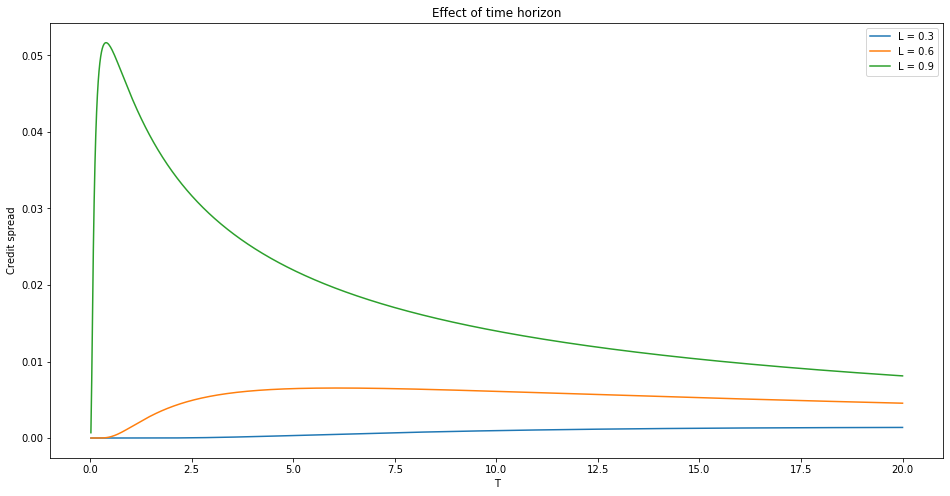

In [8]:
plt.figure(figsize = (16,8))
plt.plot(x_T , cs_T3,label = 'L = 0.3')
plt.plot(x_T,cs_T6,label = 'L = 0.6')
plt.plot(x_T,cs_T9,label = 'L = 0.9')
plt.legend()
plt.title('Effect of time horizon')
plt.xlabel('T')
plt.ylabel('Credit spread')

Text(0, 0.5, 'Credit spread')

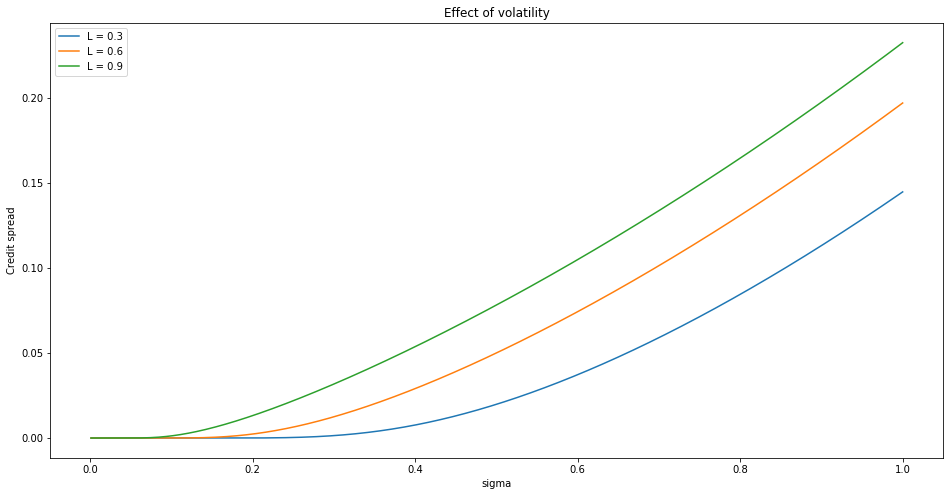

In [9]:
plt.figure(figsize = (16,8))
plt.plot(x_S , cs_S3,label = 'L = 0.3')
plt.plot(x_S,cs_S6,label = 'L = 0.6')
plt.plot(x_S,cs_S9,label = 'L = 0.9')
plt.legend()
plt.title('Effect of volatility')
plt.xlabel('sigma')
plt.ylabel('Credit spread')

# Exercise 2

In [10]:
P = np.array([[0.95 , 0.05 , 0 , 0],[0.05 , 0.8 , 0.1 , 0.05],[0 , 0.2 , 0.5 , 0.3],[0 , 0 , 0 , 1]])

## a)

In [11]:
mu = [0.2 , 0.15 , 0.1]
sig = [0.3 , 0.25 , 0.2]
V_0 = 100

In [12]:
d = [[],[],[]]
for j in range(3):
    p = P[j][3]
    for i in range(3):
        d[j].append(V_0 * np.exp(sig[j] * stats.norm.ppf(p) + mu[j] - 1/2 * sig[j]**2))
        p = p + P[j][2-i]

In [13]:

print(np.around(d,2))

[[  0.     0.    71.29]
 [ 74.64  86.9  169.89]
 [ 97.54 128.19    inf]]
